<a href="https://colab.research.google.com/github/Mberi58/Ann_Mberi/blob/main/Copy_of_Moringa_School_IP_Week7_Supervised_Learning_Ann_Mberi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HOUSE PRICING 

##1. Defining the Question 

###a) Specifying the Question

Research question 1: Which machine learning algorithm performs better and has the most
accurate result in house price prediction? And why?




Research question 2: What are the factors that have affected house prices in Malmö over the
years?


###b) Defining the Metric for Success

The prediction accuracy will be evaluated by measuring the R-Squared (R2), and Root Mean
Square Error (RSME) of the model used in training. R2 will show if the model is overfitted,
whereas RSME shows the error percentage between the actual and predicted data, which in this
case, the house prices

###c) Understanding the context 

The performance will be measured upon predicting house prices since the prediction in many
regression algorithms relies not only on a specific feature but on an unknown number of
attributes that result in the value to be predicted. House prices depend on an individual house
specification. Houses have a variant number of features that may not have the same cost due to
its location. For instance, a big house may have a higher price if it is located in desirable rich
area than being placed in a poor neighbourhood.
The data used in the experiment will be handled by using a combination of pre-processing
methods to improve the prediction accuracy

###d) Recording the Experimental Design 

The experiment is done to pre-process the data and evaluate the prediction accuracy of the
model. The experiment has multiple stages that ae required to get the prediction results. 



- Pre-processing: both datasets will be checked and pre-processed



- Data splitting: dividing the dataset into two parts is essential to train the model with one
and use the other in the evaluation. The dataset will be split 75% for training and 25%
for testing.




- Evaluation: the accuracy of both datasets will be evaluated by measuring the R2 and
RMSE rate when training the model alongside an evaluation of the actual prices on the
test dataset with the prices that are being predicted by the model.



- Correlation: correlation between the available features and house price will be
evaluated using the Pearson Coefficient Correlation to identify whether the features
have a negative, positive or zero correlation with the house price.



###e) Data Relevance 

My reseaarch aims to analyse the accuracy of predicting house
prices when using Multiple linear, Quantiles, Lasso, Ridge and Elastic Net Regression. Thus, the purpose of this study is to deepen the knowledge
in regression methods in machine learning.












In addition, the given datasets should be processed to enhance performance, which is
accomplished by identifying the necessary features by applying one of the selection methods to eliminate the unwanted variables since each house has its unique features that help to
estimate its price. These features may or may not be shared with all houses, which means they
do not have the same influence on the house pricing resulting in inaccurate output.

##2. Reading the Data

Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import mpl_toolkits
%matplotlib inline

from  scipy.stats import stats
from scipy.stats import zscore
from scipy.stats import ttest_ind

Read Dataset

In [ ]:
data = pd.read_csv('/content/house_data.csv')
data.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

##3. Checking the Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
data.shape

(21613, 20)

In [ ]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
data.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.401822e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.673622e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

From our dataset when our dataset was described we have observed several things one of them being a house that has 33 bedrooms. 

##4. Tidying the Dataset

In [ ]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

a) Validity

In [ ]:
#Outliers
# checking for outliers using IQR Scores
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outlier = (data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))
outlier.sum()


# data_no_outlier

id                  0
price            1159
bedrooms          546
bathrooms         571
sqft_living       572
sqft_lot         2425
floors              0
waterfront        163
view             2124
condition          30
grade            1911
sqft_above        611
sqft_basement     496
yr_built            0
yr_renovated      914
zipcode             0
lat                 2
long              256
sqft_living15     544
sqft_lot15       2194
dtype: int64

In [ ]:
#Checking for anomalies

q1_1, q3_1 = np.percentile(data['price'], [25, 75]) 

iqr1 = q3_1 - q1_1

l_bound = q1_1 - (1.5*iqr1)
u_bound = q3_1 + (1.5 * iqr1)

q1_2, q3_2 = np.percentile(data['bedrooms'], [25, 75]) 

iqr2 = q3_2 - q1_2

l_bound = q1_2 - (1.5*iqr2)
u_bound = q3_2 + (1.5 * iqr2)
q1_3, q3_3 = np.percentile(data['sqft_living'], [25, 75]) 

iqr3 = q3_3 - q1_3

l_bound = q1_1 - (1.5*iqr3)
u_bound = q3_3 + (1.5 * iqr3)
q1_4, q3_4 = np.percentile(data['waterfront'], [25, 75]) 

iqr4 = q3_4 - q1_4

l_bound = q1_1 - (1.5*iqr3)
u_bound = q3_3 + (1.5 * iqr3)
q1_5, q3_5 = np.percentile(data['zipcode'], [25, 75]) 

iqr5 = q3_5 - q1_5

l_bound = q1_1 - (1.5*iqr3)
u_bound = q3_3 + (1.5 * iqr3)
q1_6, q3_6 = np.percentile(data['condition'], [25, 75]) 

iqr6 = q3_6 - q1_6

l_bound = q1_1 - (1.5*iqr3)
u_bound = q3_3 + (1.5 * iqr3)
print(iqr1)
print( iqr2)
print(iqr3)
print(iqr4)
print(iqr5)
print(iqr6)

323050.0
1.0
1123.0
0.0
85.0
1.0


b) Accuracy

In [ ]:
data["yr_built"].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [ ]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

c) Completeness

In [ ]:
#Checking for null values
data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

d) Consistency

In [ ]:
#Checking for duplicates
data.duplicated().sum()

3

In [ ]:
data = data.drop_duplicates()
data

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21610 rows x 20 columns]

e) Uniformity

All our columns are uniform all as lower cases no need of changing

As for the year, it is not categorised as month day and year, its just years so its uniform and systematic 


In [ ]:
data.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161000e+04  2.161000e+04  ...   21610.000000   21610.000000
mean   4.580161e+09  5.401789e+05  ...    1986.518695   12769.031976
std    2.876547e+09  3.673876e+05  ...     685.425781   27305.972464
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.216125e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

## EXPLORATORY DATA ANALYSIS

###1. Univariate Analysis 

###a)Categorical and Categorical

Frequency Table

In [ ]:
data.head(2)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639

[2 rows x 20 columns]

In [ ]:
# Frequency table for price, zipcode and bedrooms

data.price.value_counts()

450000.0    172
350000.0    172
550000.0    158
500000.0    152
425000.0    150
           ... 
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 3625, dtype: int64

In [ ]:
# Zipcode
data.zipcode.value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [ ]:
#Bedroooms
data.bedrooms.value_counts()

3     9822
4     6881
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Bars and Histograms

####b)Numerical Variables


a) Measures of Central tendancy

In [ ]:
data.head(1)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650

[1 rows x 20 columns]

In [ ]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#Mean
print('Mean')
price_mean = data['price'].mean()
print('The mean for price	is :',price_mean)

bedrooms_mean = data['bedrooms'].mean()
print('The mean for bedrooms is :',bedrooms_mean)

bathrooms_mean = data['bathrooms'].mean()
print('The mean for bathrooms is :',bathrooms_mean)

floors_mean = data['floors'].mean()
print('The mean for floors is :',floors_mean)

sqft_living_mean = data['sqft_living'].mean()
print('The mean for sqft_living is :',sqft_living_mean)


print('\n')

Mean
The mean for price	is : 540182.1587933188
The mean for bedrooms is : 3.37084162309721
The mean for bathrooms is : 2.1147573219821405
The mean for floors is : 1.4943089807060566
The mean for sqft_living is : 2079.8997362698374




In [ ]:
#Median
print('Median')
price_median = data['price'].median()
print('The median for price	is :',price_median)

bedrooms_median = data['bedrooms'].median()
print('The median for bedrooms is :',bedrooms_median)

bathrooms_median = data['bathrooms'].median()
print('The median for bathrooms is :',bathrooms_median)

floors_median = data['floors'].median()
print('The median for floors is :',floors_median)

sqft_living_median = data['sqft_living'].mean()
print('The median for sqft_living is :',sqft_living_median)



Median
The median for price	is : 450000.0
The median for bedrooms is : 3.0
The median for bathrooms is : 2.25
The median for floors is : 1.5
The median for sqft_living is : 2079.8997362698374




In [ ]:
#Mode
print('Mode')
price_mode = data['price'].mode()
print('The mode for price	is :',price_mode)

bedrooms_mode = data['bedrooms'].mode()
print('The mode for bedrooms is :',bedrooms_mode)

bathrooms_mode = data['bathrooms'].mode()
print('The mode for bathrooms is :',bathrooms_mode)

floors_mode = data['floors'].mode()
print('The mode for floors is :',floors_mode)

sqft_living_mode = data['sqft_living'].mode()
print('The mode for sqft_living is :',sqft_living_mode)

Mode
The mode for price	is : 0    350000.0
1    450000.0
dtype: float64
The mode for bedrooms is : 0    3
dtype: int64
The mode for bathrooms is : 0    2.5
dtype: float64
The mode for floors is : 0    1.0
dtype: float64
The mode for sqft_living is : 0    1300
dtype: int64


b) Measures of Central dispersion 

In [ ]:
#var
print('variance')
price_var = data['price'].var()
print('The variance for price	is :',price_var)

bedrooms_var = data['bedrooms'].var()
print('The variance for bedrooms is :',bedrooms_var)

bathrooms_var = data['bathrooms'].var()
print('The variance for bathrooms is :',bathrooms_var)

floors_var = data['floors'].var()
print('The variance for floors is :',floors_var)

sqft_living_var = data['sqft_living'].var()
print('The variance for sqft_living is :',sqft_living_var)

variance
The variance for price	is : 134955009292.83669
The variance for bedrooms is : 0.8650150097573724
The variance for bathrooms is : 0.5931512887355798
The variance for floors is : 0.29158800687709074
The variance for sqft_living is : 843533.6813681519


In [ ]:
#std
print('Standard Deviation')
price_std = data['price'].std()
print('The standard deviation for price	is :',price_std)

bedrooms_std = data['bedrooms'].std()
print('The standard deviation for bedrooms	is :',bedrooms_std)

bathrooms_std = data['bathrooms'].std()
print('The standard deviation for bathrooms	is :',bathrooms_std)

floors_std = data['floors'].std()
print('The standard deviation for floors	is :',floors_std)

sqft_living_std = data['sqft_living'].std()
print('The standard deviation for sqft_living is :',sqft_living_std)

Standard Deviation
The standard deviation for price	is : 367362.23171800975
The standard deviation for bedrooms	is : 0.9300618311474632
The standard deviation for bathrooms	is : 0.7701631572177287
The standard deviation for floors	is : 0.5399888951423824
The standard deviation for sqft_living is : 918.4408970468115


In [ ]:
#finding the range for values
print ( 'The range for price is :',values_range)
values_max= data['price'].max()
values_min= data['price'].min()
values_range= values_max - values_min

print ( 'The range for bedrooms is :',values_range)
values_max= data['bedrooms'].max()
values_min= data['bedrooms'].min()
values_range= values_max - values_min

print ( 'The range for bathrooms is :',values_range)
values_max= data['bathrooms'].max()
values_min= data['bathrooms'].min()
values_range= values_max - values_min


print ( 'The range for floors is :',values_range)
values_max= data['floors'].max()
values_min= data['floors'].min()
values_range= values_max - values_min

print ( 'The range for sqft_living is :',values_range)
values_max= data['sqft_living'].max()
values_min= data['sqft_living'].min()
values_range= values_max - values_min


The range for price is : 13250
The range for bedrooms is : 7625000.0
The range for bathrooms is : 33
The range for floors is : 8.0
The range for sqft_living is : 2.5


In [ ]:
#finding quantile

price_quantiles= data['price'].quantile([0.25,0.50,0.75])
print('The quantiles for price is :\n',price_quantiles)
bedrooms_quantiles= data['bedrooms'].quantile([0.25,0.50,0.75])
print('The quantiles for bedrooms is :\n',bedrooms_quantiles)
bathrooms_quantiles= data['bathrooms'].quantile([0.25,0.50,0.75])
print('The quantiles for bathrooms is :\n', bathrooms_quantiles)
floors_quantiles= data['floors'].quantile([0.25,0.50,0.75])
print('The quantiles for floors is :\n',floors_quantiles)
sqft_living_quantiles = data['sqft_living'].quantile([0.25,0.50,0.75])
print('The quantiles for sqft_living is :\n',sqft_living_quantiles)



The quantiles for price is :
 0.25    321950.0
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64
The quantiles for bedrooms is :
 0.25    3.0
0.50    3.0
0.75    4.0
Name: bedrooms, dtype: float64
The quantiles for bathrooms is :
 0.25    1.75
0.50    2.25
0.75    2.50
Name: bathrooms, dtype: float64
The quantiles for floors is :
 0.25    1.0
0.50    1.5
0.75    2.0
Name: floors, dtype: float64
The quantiles for sqft_living is :
 0.25    1427.0
0.50    1910.0
0.75    2550.0
Name: sqft_living, dtype: float64


###2. Bivariate Analysis 

Scatter Plots

In [ ]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
data['price'],value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

NameError: ignored

Visualizing the location of the houses based on latitude and longitude

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

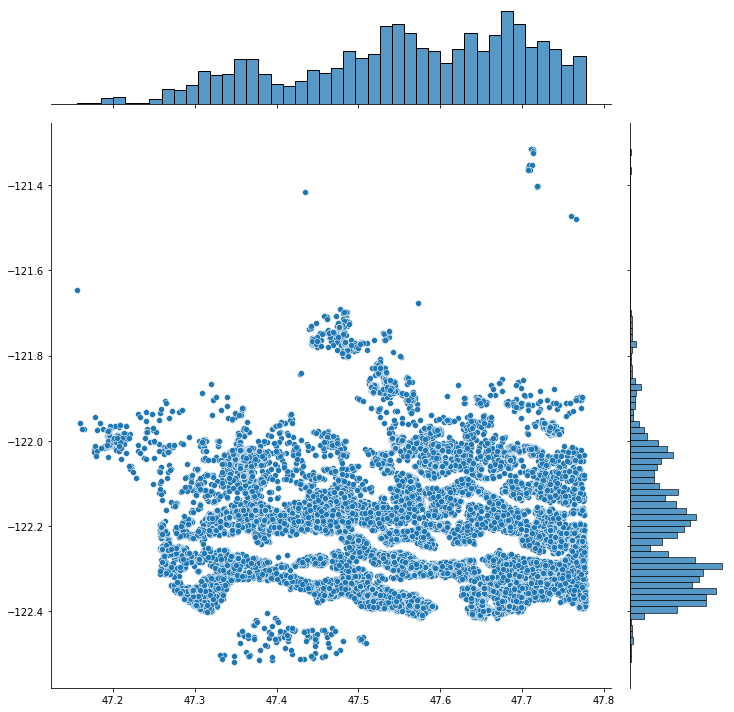

<function seaborn.utils.despine>

In [ ]:
plt.figure(figsize = (10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

# I have used seaborn to ge0t this visualization, and Joinplot function helps see the concentration of data and placement of data


We can see the latitude from -47.7 there are many houses the same as longitude between -122.2 to -122.4 the concentration is high. Which would mean that most of the buyers are form this particular location

We observe other factors that are are affecting the house pricing 


Text(0.5, 1.0, 'Price vs Square Feet')

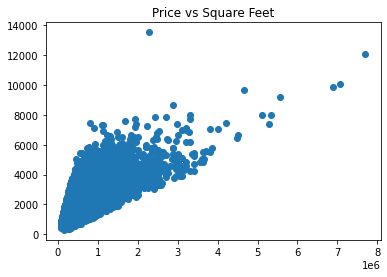

In [ ]:
# Squarefeet
plt.scatter(data.price, data.sqft_living)
plt.title('Price vs Square Feet')

We observe that the more the living area, the more or higher the price, We can also see something unique the data points seem to be in a linear direction 

Text(0.5, 1.0, 'Price vs Location of the area')

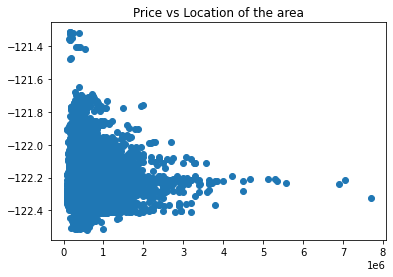

In [ ]:
#Location of the area
plt.scatter(data.price, data.long)
plt.title('Price vs Location of the area')

Location of the houses determine the house prices, from our observations -122.2 to -122.4 houses are sold at much higher prices 

<function seaborn.utils.despine>

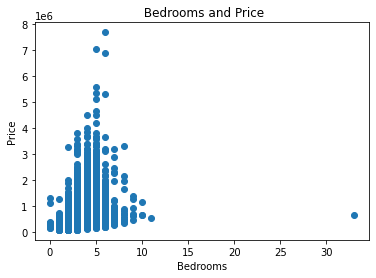

In [ ]:
# Number of Bedrooms
#
plt.scatter(data.bedrooms, data.price)
plt.title(' Bedrooms and Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
sns.despine

We observe that with more bedrooms the higher the price. We can also see a house that has 33 bedrooms  

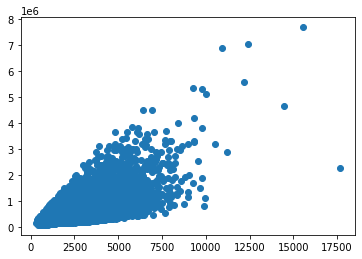

In [ ]:
# Square feet living and square feet basement
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])

Text(0.5, 1.0, 'Waterfront vs Price (0 = no waterfront)')

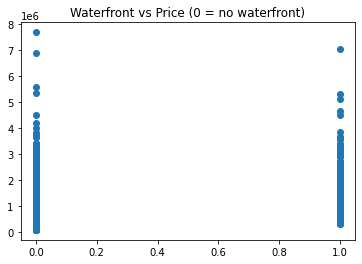

In [ ]:
# Lets use Waterfront
# 
plt.scatter(data.waterfront, data.price)
plt.title('Waterfront vs Price (0 = no waterfront)')

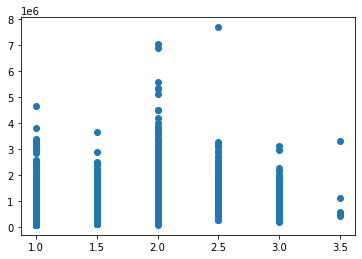

In [ ]:
# We observe using the number of floors 
#
plt.scatter(data.floors, data.price)

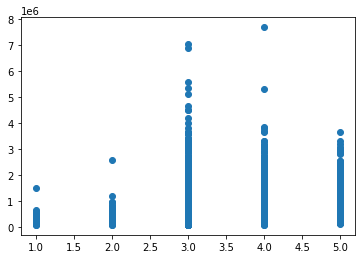

In [ ]:
plt.scatter(data.condition, data.price)

Floors vs Price and Condition vs Price

Text(0.5, 1.0, 'Which location is pricey by Zipcode')

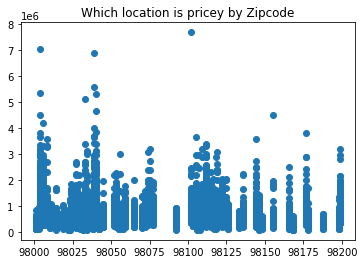

In [ ]:
# Zipcode 
#
plt.scatter(data.zipcode, data.price)
plt.title('Which location is pricey by Zipcode')

In [ ]:
# Finding the correlation between the features 
corr = data.corr()
corr.shape

(20, 20)

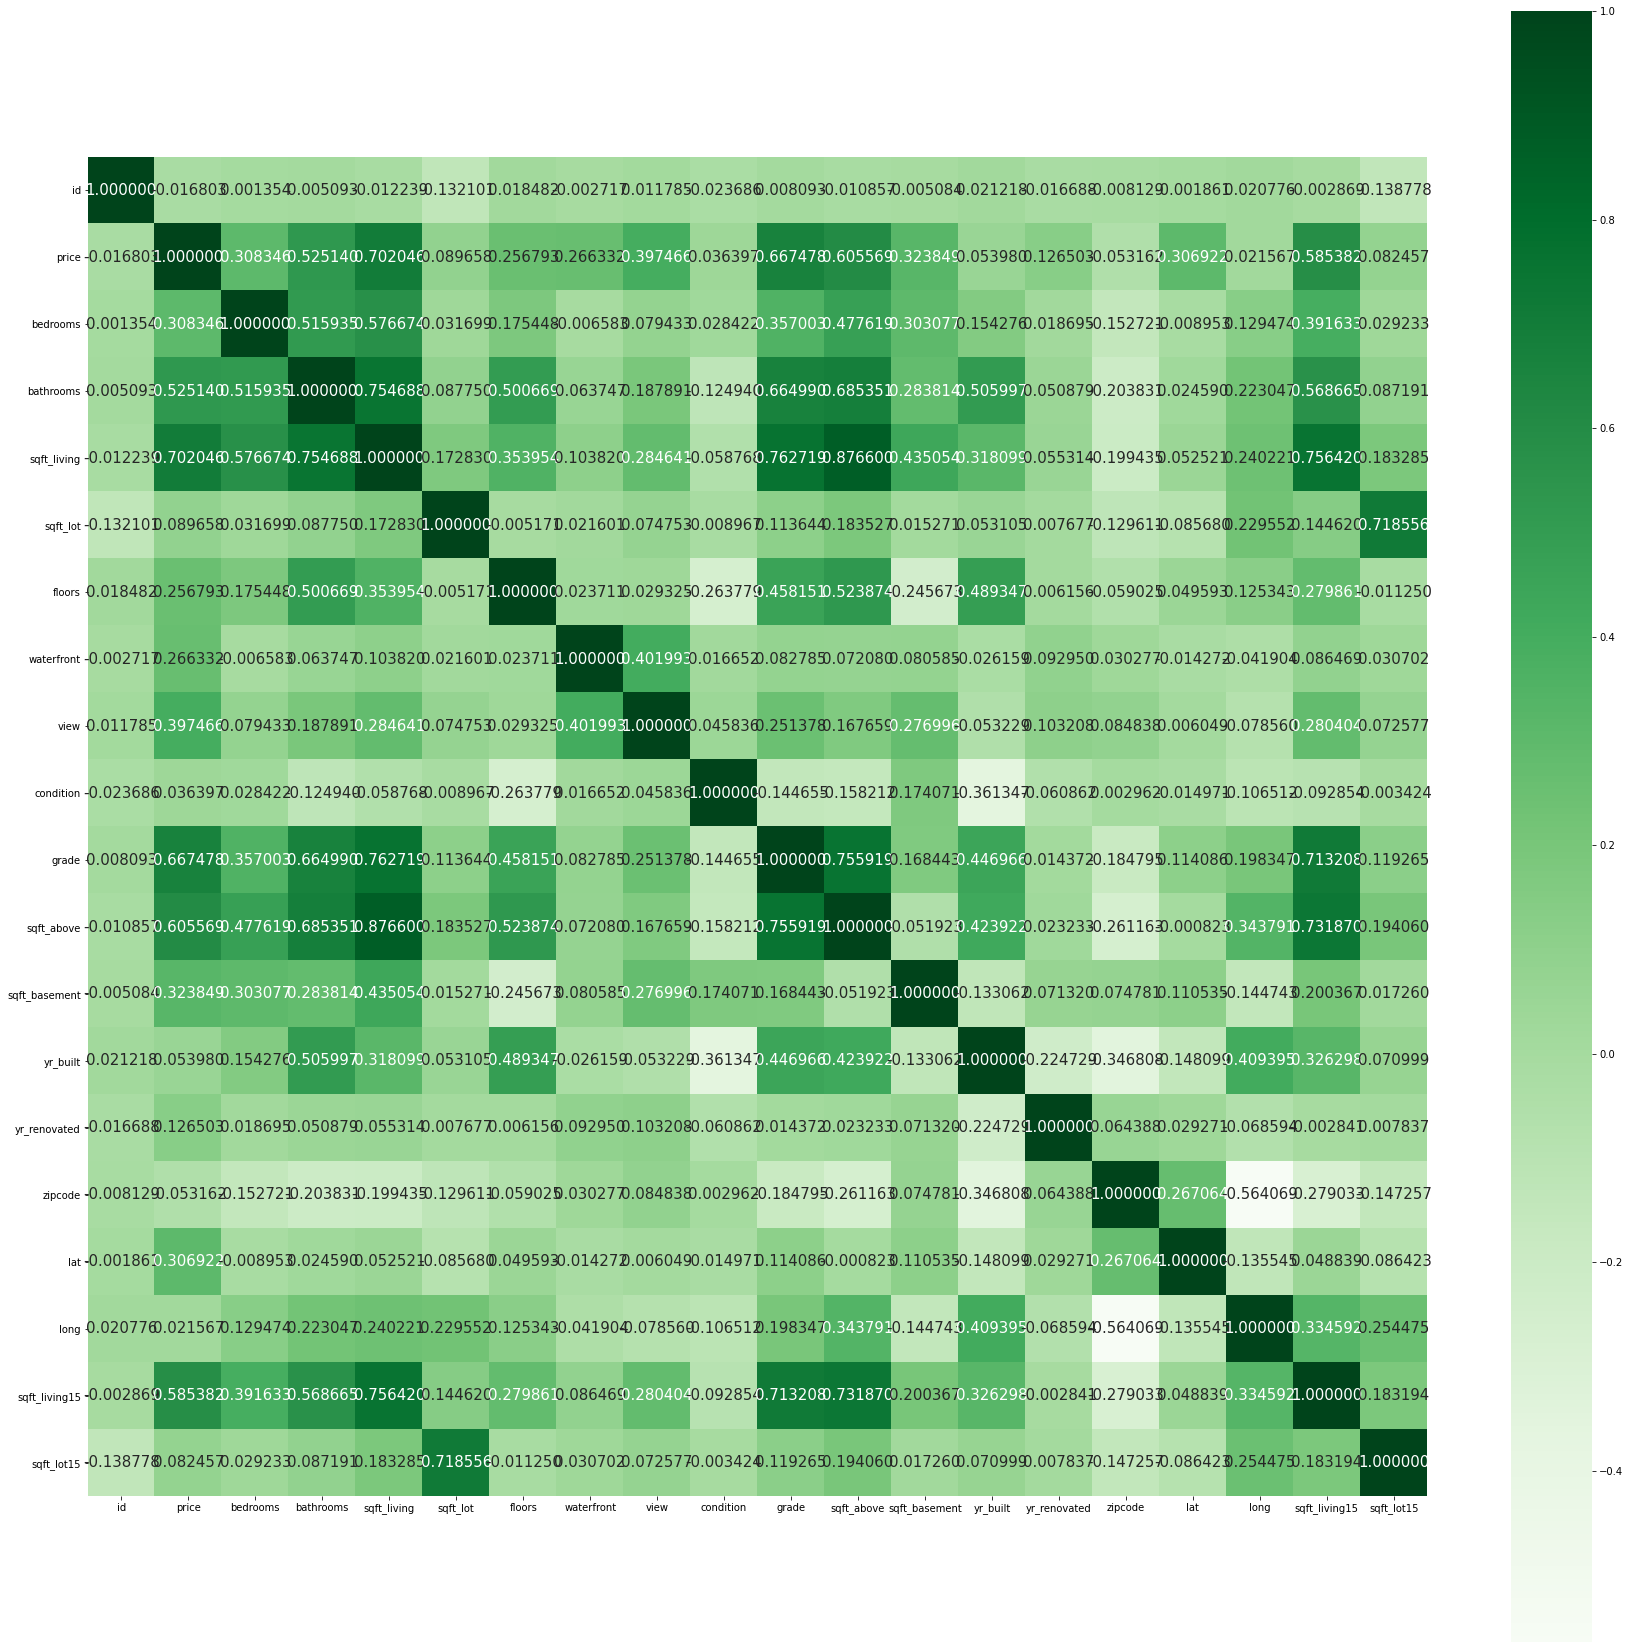

In [ ]:
#Plotting the heatmap of correlation between the features 
plt.figure(figsize=(30,30))
sns.heatmap(corr,cbar=True, square=True, fmt='1f', annot=True, annot_kws={'size':15}, cmap='Greens')

###3. Multivariate Analyis


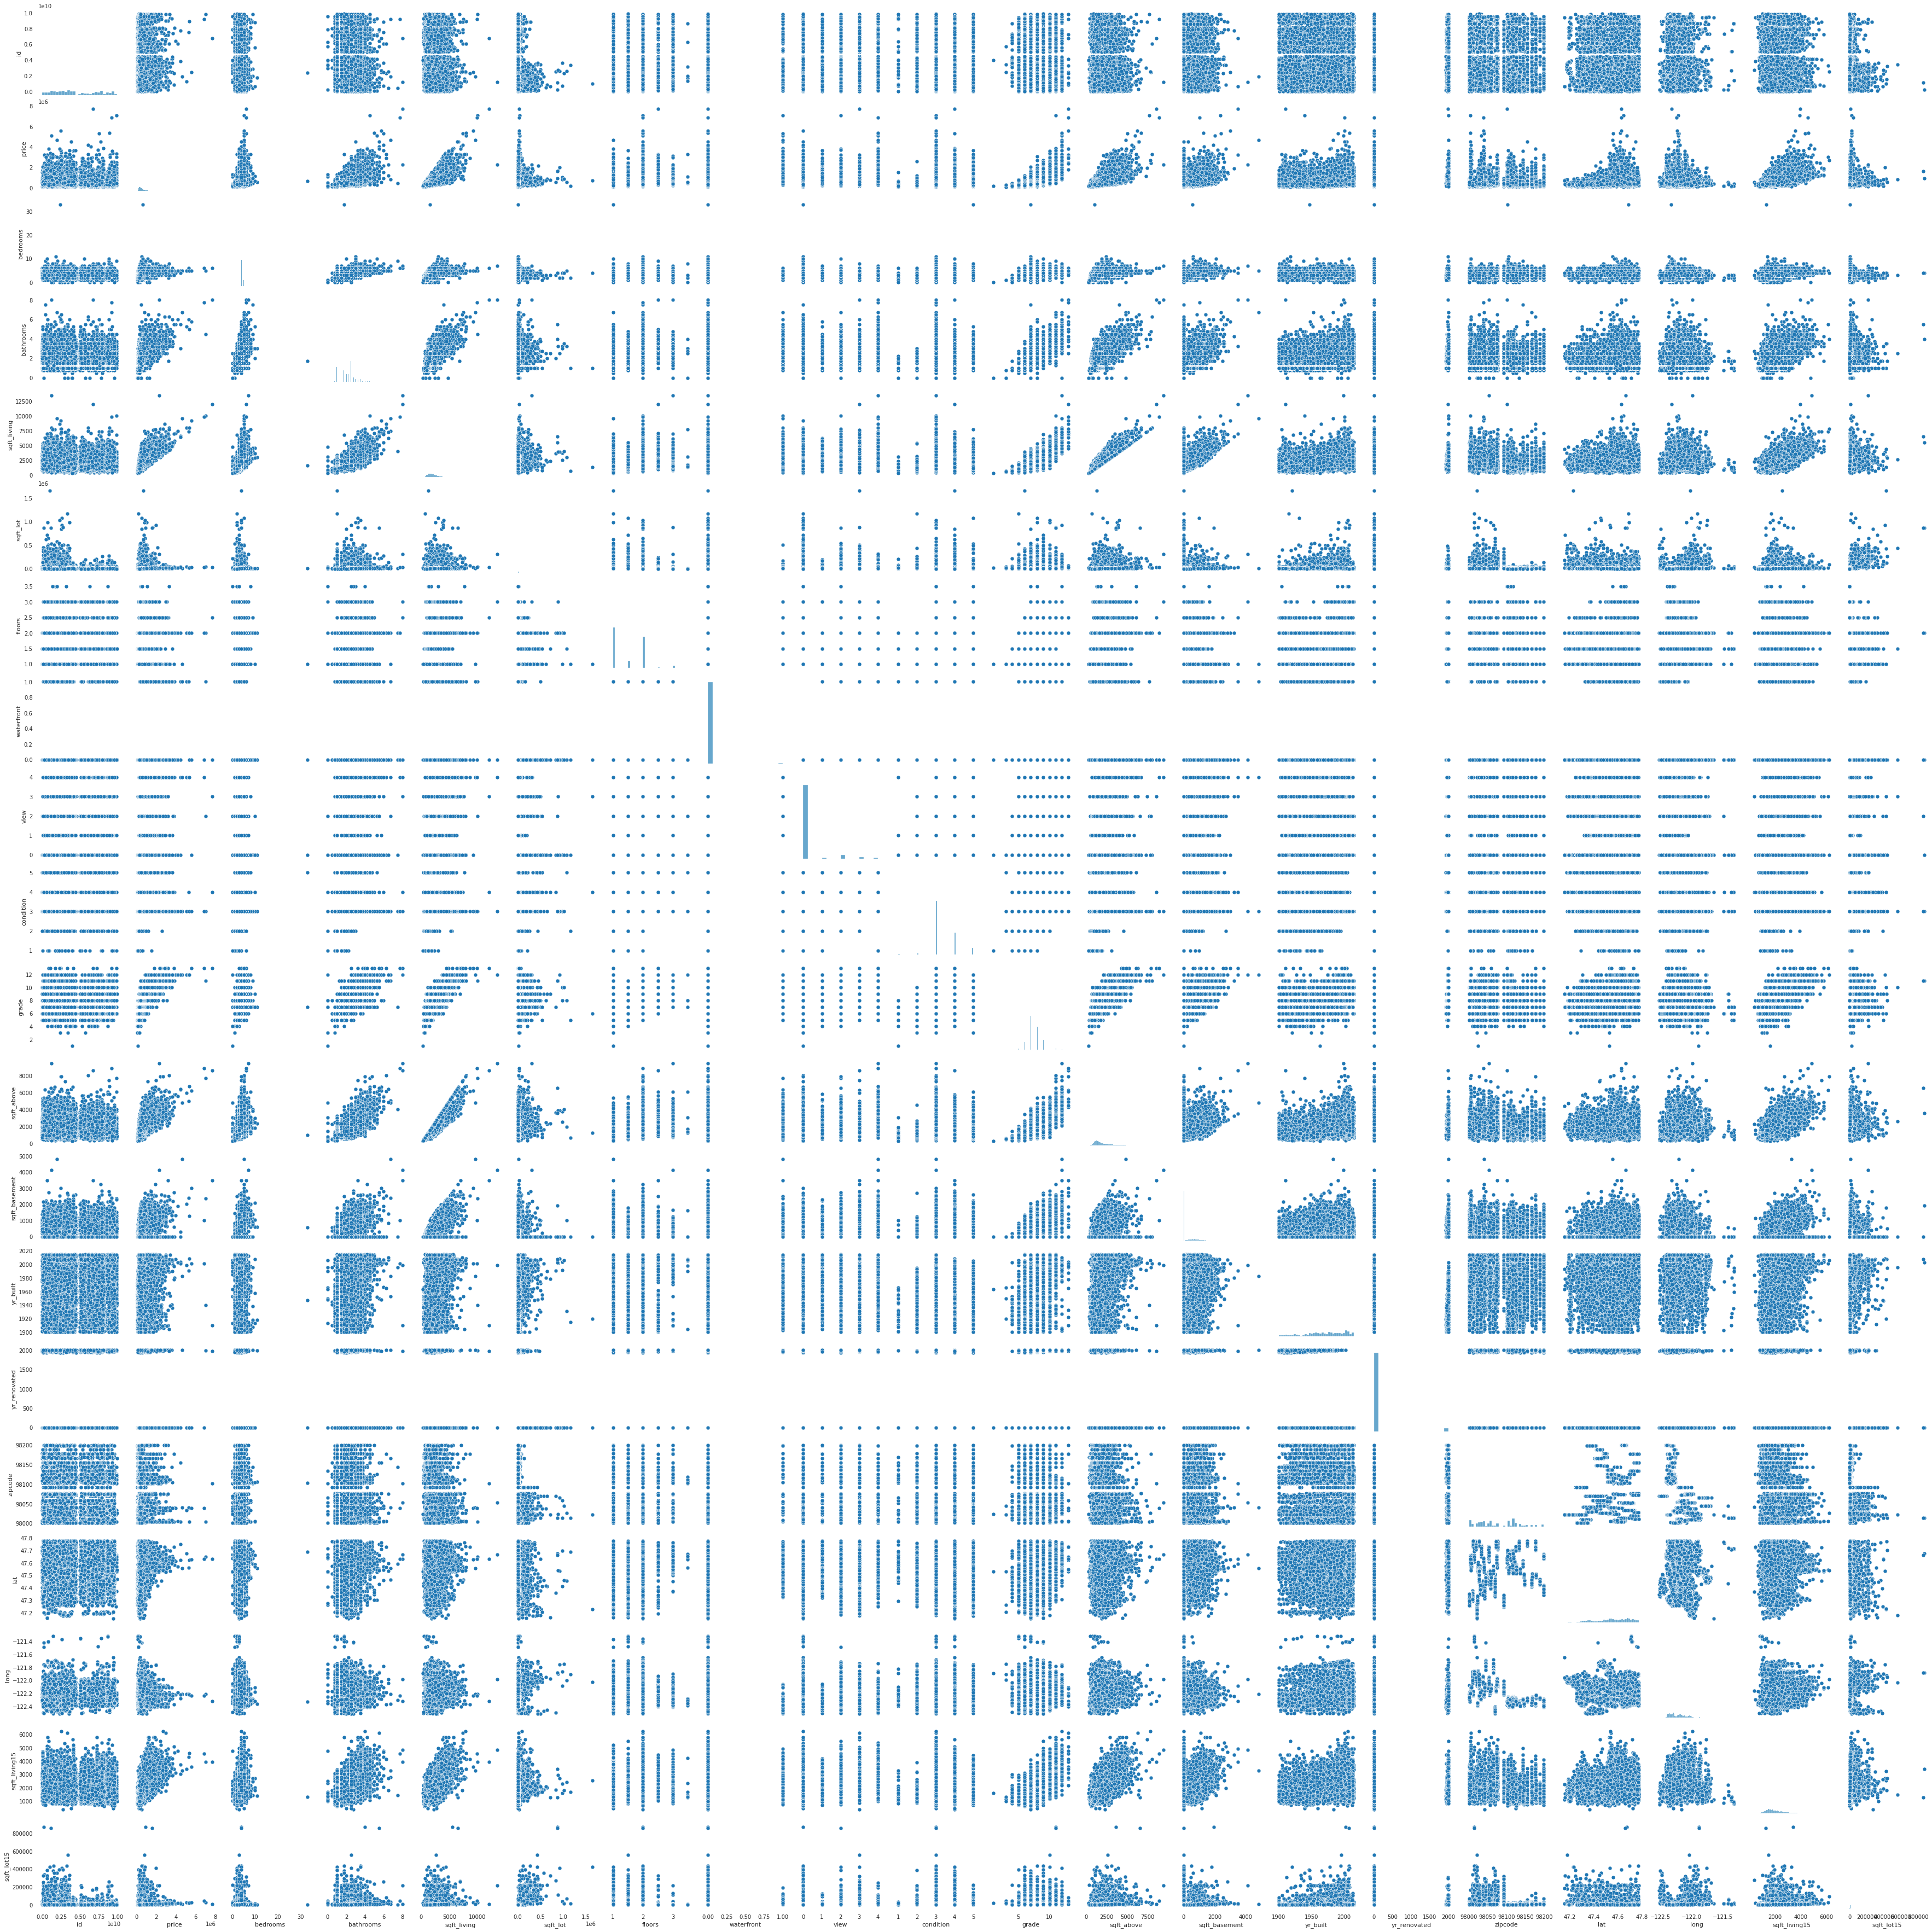

In [ ]:
#Plotting a pair plot
sns.pairplot(data)
plt.show()

###POLYNOMINAL REGRESSION 

####1. Predicting House pricing


Detecting multicollinearity

In [ ]:
# The columns we have
# Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#      'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
#       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
#       'sqft_living15', 'sqft_lot15'],

In [ ]:
# Remove the serial and admit chance columns, we want to focus on our independent variables only.
independent_only = data[['price', 'bedrooms',	'sqft_living','zipcode']]


# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

price  bedrooms  sqft_living   zipcode
price        1.000000  0.308346     0.702046 -0.053162
bedrooms     0.308346  1.000000     0.576674 -0.152721
sqft_living  0.702046  0.576674     1.000000 -0.199435
zipcode     -0.053162 -0.152721    -0.199435  1.000000

In [ ]:
# Displaying our vif score
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

price  bedrooms  sqft_living   zipcode
price        2.056502  0.287475    -1.644382 -0.174716
bedrooms     0.287475  1.541764    -1.084025  0.034550
sqft_living -1.644382 -1.084025     2.842154  0.313852
zipcode     -0.174716  0.034550     0.313852  1.058581

Importing Libraries

In [ ]:
#Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
data.head(2)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639

[2 rows x 20 columns]

In [ ]:
# We define both our x and y axis
x= data[['price', 'bedrooms', 'sqft_living', 'waterfront', 'zipcode']]
y=data['price'].values

In [ ]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
x_poly = poly_reg.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)


pol_reg = LinearRegression()
pol_reg.fit(x_train, y_train)
pol_reg = LinearRegression()
pol_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = pol_reg.predict(x_test)

In [ ]:
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

Actual     Predicted
count  4.322000e+03  4.322000e+03
mean   5.434344e+05  5.434344e+05
std    3.625612e+05  3.625612e+05
min    8.100000e+04  8.100000e+04
25%    3.230000e+05  3.230000e+05
50%    4.500000e+05  4.500000e+05
75%    6.500000e+05  6.500000e+05
max    4.000000e+06  4.000000e+06

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.956117486618161e-05
Mean Squared Error: 1.0573458260223151e-08
Root Mean Squared Error: 0.00010282732253746157


KFold Cross Validation

In [ ]:
from sklearn.model_selection import KFold

# We will use the same 6 independent variabes for this 
x= data[['price', 'bedrooms', 'sqft_living','waterfront', 'zipcode']].values
y=data['price'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(x)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(x):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(x_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(x_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.4128021851494535e-10

Training model 2
Model 2 Root Mean Squared Error: 2.1457030338254554e-10

Training model 3
Model 3 Root Mean Squared Error: 7.09236528932877e-11

Training model 4
Model 4 Root Mean Squared Error: 9.055315960151617e-11

Training model 5
Model 5 Root Mean Squared Error: 8.590170729152598e-11


In [ ]:
# We compute the average by creating array RMSES to gather all the RMSE values 

np.mean(RMSES)

1.2064580833676415e-10

###Bartlett's Test


Finding Residuals

In [ ]:
# We create the residual by subtracting the test value from the predicted value in our dataset 

residuals = np.subtract(y_pred, y_test)

# We then describe our residual
pd.DataFrame(residuals).describe()

0
count  4.322000e+03
mean  -3.636295e-12
std    8.583464e-11
min   -1.164153e-10
25%   -5.820766e-11
50%    0.000000e+00
75%    0.000000e+00
max    9.313226e-10

In [ ]:
residuals.mean()

-3.636295337028274e-12

In [ ]:
import scipy as sp

test_results, p_value = sp.stats.bartlett(y_pred, residuals)
test_results, p_value

(305106.2976048379, 0.0)

In [ ]:
# We compute the  critical value of the chi squared to interpret the results
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

inf


In [ ]:
if (test_results > critical_value):
  print('the variance are  unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


##REGRESSION

Regression works on the line equation y = mx+c, trend line is set through the data points to predict the outcome

The variable we are predicting is called Criterion Variable is referred as Y


The variable we are basing our predictions on is called Predictor  variable and is referred to as X.



When there is only one predictor variable the prediction method is called Simple Regression and if we have multiple variables present then we use multiple regression

##Multiple Linear Regression 

Multiple Linear Regression (MLR) is a supervised technique used to estimate the relationship
between one dependent variable and more than one independent variables. Identifying the
correlation and its cause-effect helps to make predictions by using these relations . To
estimate these relationships, the prediction accuracy of the model is essential; the complexity
of the model is of more interest. However, Multiple Linear Regression is prone to many
problems such as multicollinearity, noises, and overfitting, which effect on the prediction
accuracy.


In [ ]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Preparing the Data
# .....
# Dividing the data into attributes and labels as we did previously. 
# However, unlike last time, this time around we are going to use column names for creating an attribute set and label.
# ---
#
x = data[['bedrooms', 'bathrooms', 'sqft_living','floors', 'waterfront','condition','zipcode']]
y = data['price']

In [ ]:
# Splitting data to training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 4)

In [ ]:
# Training the Algorithm
# ---
# To train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class
# ---
# 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# In case of multivariable linear regression, the regression model has to 
# find the most optimal coefficients for all the attributes. 
# To see what coefficients our regression model has chosen, execute the following
# 
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df


Coefficient
bedrooms     -51750.747984
bathrooms     14451.161401
sqft_living     300.500627
floors        16826.592350
waterfront   727830.286759
condition     51739.804671
zipcode         528.537622

In [ ]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(x_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual      Predicted
10313  550500.0  293079.102321
5310   390000.0  466673.945598
20656  560000.0  723222.398649
21609  400000.0  599662.549826
10154  310000.0  275108.059671
...         ...            ...
7464   650000.0  564868.704505
2908   579950.0  382034.234594
20477  355000.0  310741.507909
11250  635000.0  403447.813269
11760  590000.0  618123.972272

[6483 rows x 2 columns]

In [ ]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 162714.9099902699
Mean Squared Error: 60501735477.621124
Root Mean Squared Error: 245971.0053596178


##Quantile  Regression

In [ ]:
x = data[['bedrooms', 'bathrooms', 'sqft_living','floors', 'waterfront','condition','zipcode']]
y = data['price']

In [ ]:
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2788
Model:                       QuantReg   Bandwidth:                   3.003e+04
Method:                 Least Squares   Sparsity:                    4.331e+05
Date:                Sun, 30 May 2021   No. Observations:                21610
Time:                        09:25:46   Df Residuals:                    21602
                                        Df Model:                            7
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -855.5015      5.227   -163.663      0.000    -865.747    -845.256
x[0]       -5.104e+04   1983.789    -25.727      0.000   -5.49e+04   -4.71e+04
x[1]        1351.4531   3206.293      0.422      0.673   -4933.118    7636.024
x[2]         243.1645      2.608     93.239      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [ ]:
quantiles = np.arange(0.25,1,0.25)
models = []
params = []
# We build models for each quantile in our list quantiles 
# we also store the model parameters in a list called params. 
mod = smf.quantreg('bedrooms ~ bathrooms + sqft_living + floors + waterfront + condition + zipcode', data)
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['bathrooms'], res.params['sqft_living'], res.params['floors'], res.params['waterfront'],res.params['condition'], res.params['zipcode']])
# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['quantiles', 'intercept', 'bathrooms_coef', 'sqft_living_coef', 'floors_coef', 'waterfront_coef', 'condition_coef', 'zipcode_coef'])
params

quantiles  intercept  ...  condition_coef  zipcode_coef
0       0.25   0.000316  ...        0.093116      0.000012
1       0.50   0.000472  ...        0.076378      0.000019
2       0.75   0.000068  ...        0.073275      0.000021

[3 rows x 8 columns]

##Ridge Regression

It is an estimation procedure to manage collinearity without removing
variables from the regression model.

In [ ]:
data.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.401822e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.673622e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

In [ ]:
# Importing our libraries
# 
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# installing !pip install pydataset and importing pydataset so as to use a dataset from the package
# 
!pip install pydataset
from pydataset import data 

     |████████████████████████████████| 15.9MB 246kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-cp37-none-any.whl size=15939431 sha256=87f354ea2b2aa4f30ff9f8c50aa26ef7e2bebf950f34fb103068ba89449036db
  Stored in directory: /root/.cache/pip/wheels/fe/3f/dc/5d02ccc767317191b12d042dd920fcf3432fab74bc7978598b
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


In [ ]:
# Data Preparation
# Setting up our x and y datasets 
#-----
#
#x = data[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'condition', 'zipcode']]
#y = data['price']


# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(x,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(x)))
print(first_model)

60095705008.697754


In [ ]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(x,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 



60293006262.70976

In [ ]:
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.



AttributeError: ignored

##Lasso Regression

Lasso
is powerful when it comes to feature selection and reducing the overfitting

Loading the Libraries 

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [ ]:
data.head(2)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639

[2 rows x 20 columns]

In [ ]:
house_data = data[data['yr_renovated']>0]
house_data.head(1)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
1  6414100192  538000.0         3  ... -122.319           1690        7639

[1 rows x 20 columns]

In [ ]:
house_data = data[data['yr_built']>0]
house_data

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21613 rows x 20 columns]

In [ ]:
# Lets drop some columns 
house_data = data.drop(['id','sqft_living15',	'sqft_lot15'], axis=1)
house_data.head()

price  bedrooms  bathrooms  ...  zipcode      lat     long
0  221900.0         3       1.00  ...    98178  47.5112 -122.257
1  538000.0         3       2.25  ...    98125  47.7210 -122.319
2  180000.0         2       1.00  ...    98028  47.7379 -122.233
3  604000.0         4       3.00  ...    98136  47.5208 -122.393
4  510000.0         3       2.00  ...    98074  47.6168 -122.045

[5 rows x 17 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
house_data['yr_built'] = labelencoder.fit_transform(house_data['yr_built'])
house_data['yr_renovated'] = labelencoder.fit_transform(house_data['yr_renovated'])

In [ ]:
#Checking for duplicates
house_data.duplicated().sum()

5

In [ ]:
house_data = data.drop_duplicates()
house_data

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21610 rows x 20 columns]

In [ ]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
# 

# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#
X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']]
y = house_data[['price']]

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(x, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(x, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(x))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.5547390800648033
lasso MSE: 60095705018.01423
lasso coef: [-49177.60889908  12756.10135661 274453.50378907   8390.07969477
  66587.81830633  33510.342122    28673.45218097]


In [ ]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(x_train, y_train) 
linear.fit(x_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(x_test, y_test))
print("linear score:", linear.score(x_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(x_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(x_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.561531732443757
linear score: 0.5615379458356863
lasso MSE: 59628180869.38423
linear MSE: 59627335897.72907
lasso best estimator coef: [-49991.59961714  11340.81369755 275681.29478941   8613.39050362
  62425.18772917  31919.9453661   28630.22565972]
linear coef: [[-50050.3107523   11367.27502    275719.69841115   8631.62646238
   62438.79006797  31955.96234093  28658.99625655]]


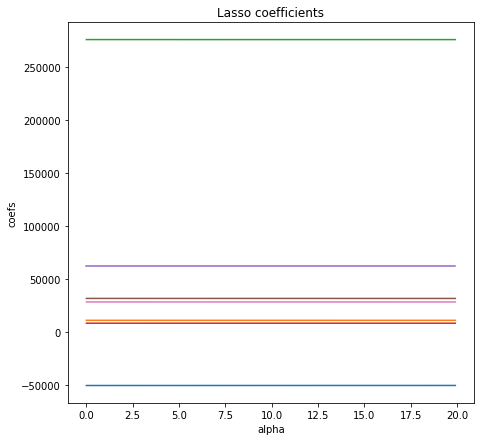

In [ ]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(x_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

##Elastic Net Regression

In [ ]:
# Use the fair dataset from the pydataset library to predict marriage satisfaction based on the given variables.
# ---
# 
!pip install pydataset

In [ ]:
# Importing our libraries
# 
from pydataset import data
import numpy as np
import pandas as pd


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']]
y = house_data[['price']]

In [ ]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(x,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(x)))
print(first_model) 

60095705008.69779


In [ ]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,house_data.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'id': array([-49180.09618741,  12757.13245839, 274455.13641686,   8390.86921584,
         66588.48745233,  33511.83121173,  28674.63002441])}

In [ ]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(x,y)
search.best_params_
abs(search.best_score_)

60518286775.199196

In [ ]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 1.08. This is above our baseline model of MSE 1.05  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(x,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(x)))
print(second_model)

104763539859.26923


In [ ]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,house_data.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that occupation was completely removed from the model in the elastic net version. 
# This means that this values was no good to the algorithm. Traditional regression cannot do this.

{'bathrooms': 10628.519490829693,
 'bedrooms': 35530.827088977065,
 'floors': -858.6912246602801,
 'id': 12246.063455602114,
 'price': 24018.640226663374,
 'sqft_living': 14435.831616734482,
 'sqft_lot': 3229.6719929833143}

##CONCLUSION 

The study shows comparisons between diffrent regression algorithms when predicting house prices of different states in the united states according to the zip codes provided. 



Both my defined questions were answered. 


Question 1:- The algorithms used all gave good outcomes but Lasso regression made the best performance overall when both R2 andd RMSE scores were taken into consideration. 




Question 2:- Many factors were taken into consideration for affecting the pricing of the houses. We can see many bedrooms, location, among other factors greatly affecting. More bedrooms higher pricing, posh location and the house pricing shootts and vice versa.


In conclusion it means when this factors increase, the house price increase. 